# Stroke Predicton - Data Preparation

##  Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## Import Dataset

In [2]:
dataframe = pd.read_csv('healthcare-dataset-stroke-data.csv',index_col=0)
print(dataframe.head(5))

       gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0             0              1          Yes        Private   
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
60182  Female  49.0             0              0          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
9046           Urban             228.69  36.6  formerly smoked       1  
51676          Rural             202.21   NaN     never smoked       1  
31112          Rural             105.92  32.5     never smoked       1  
60182          Urban             171.23  34.4           smokes       1  
1

Attribute Information
* 1) id: unique identifier p
* 2) gender: "Male", "Female" or "Other"
* 3) age: age of the patient
* 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* 6) ever_married: "No" or "Yes"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) Residence_type: "Rural" or "Urban"
* 9) avg_glucose_level: average glucose level in blood
* 10) bmi: body mass index
* 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) stroke: 1 if the patient had a stroke or 0 if not
* Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Nulls

In [3]:
media_com = dataframe[dataframe['stroke']==1]
print("média do bmi dos individuos que tiveram stroke:", np.round(media_com["bmi"].mean(),1))

media_sem = dataframe[dataframe['stroke']==0]
print("média do bmi dos individuos que não tiveram stroke:", np.round(media_sem["bmi"].mean(),1))

#Substituir missing values pela média dos valores, arredondado a uma casa décimal
media_bmi = np.round(dataframe["bmi"].mean(),2)
print("média bmi: " + str(media_bmi))
dataframe['bmi'] = dataframe['bmi'].fillna(media_bmi)
dataframe.isnull().sum()

média do bmi dos individuos que tiveram stroke: 30.5
média do bmi dos individuos que não tiveram stroke: 28.8
média bmi: 28.89


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Get Dummies

In [4]:
#Tratamento de dados
X = dataframe.dropna(axis = 0, how ='any')
X = pd.concat([X,pd.get_dummies(X['gender'], prefix='gender')],axis=1)
X = pd.concat([X,pd.get_dummies(X['ever_married'], prefix='ever_married')],axis=1)
X = pd.concat([X,pd.get_dummies(X['work_type'], prefix='work_type')],axis=1)
X = pd.concat([X,pd.get_dummies(X['Residence_type'], prefix='Residence_type')],axis=1)
X = pd.concat([X,pd.get_dummies(X['smoking_status'], prefix='smoking_status')],axis=1)
X = X.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)
df = X[['age',                            
    'hypertension',               
    'heart_disease',                  
    'avg_glucose_level',               
    'bmi',                                                   
    'gender_Female',                  
    'gender_Male',                     
    'gender_Other',                      
    'ever_married_No',                
   'ever_married_Yes',                
   'work_type_Govt_job',               
   'work_type_Never_worked',         
   'work_type_Private',                 
   'work_type_Self-employed',          
   'work_type_children',              
   'Residence_type_Rural',             
   'Residence_type_Urban',            
   'smoking_status_Unknown',          
   'smoking_status_formerly smoked',  
   'smoking_status_never smoked',     
   'smoking_status_smokes',
   'stroke']]

print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Female                   5110 non-null   uint8  
 7   gender_Male                     5110 non-null   uint8  
 8   gender_Other                    5110 non-null   uint8  
 9   ever_married_No                 5110 non-null   uint8  
 10  ever_married_Yes                5110 non-null   uint8  
 11  work_type_Govt_job              5110 non-null   uint8  
 12  work_type_Never_worked        

## Smoke

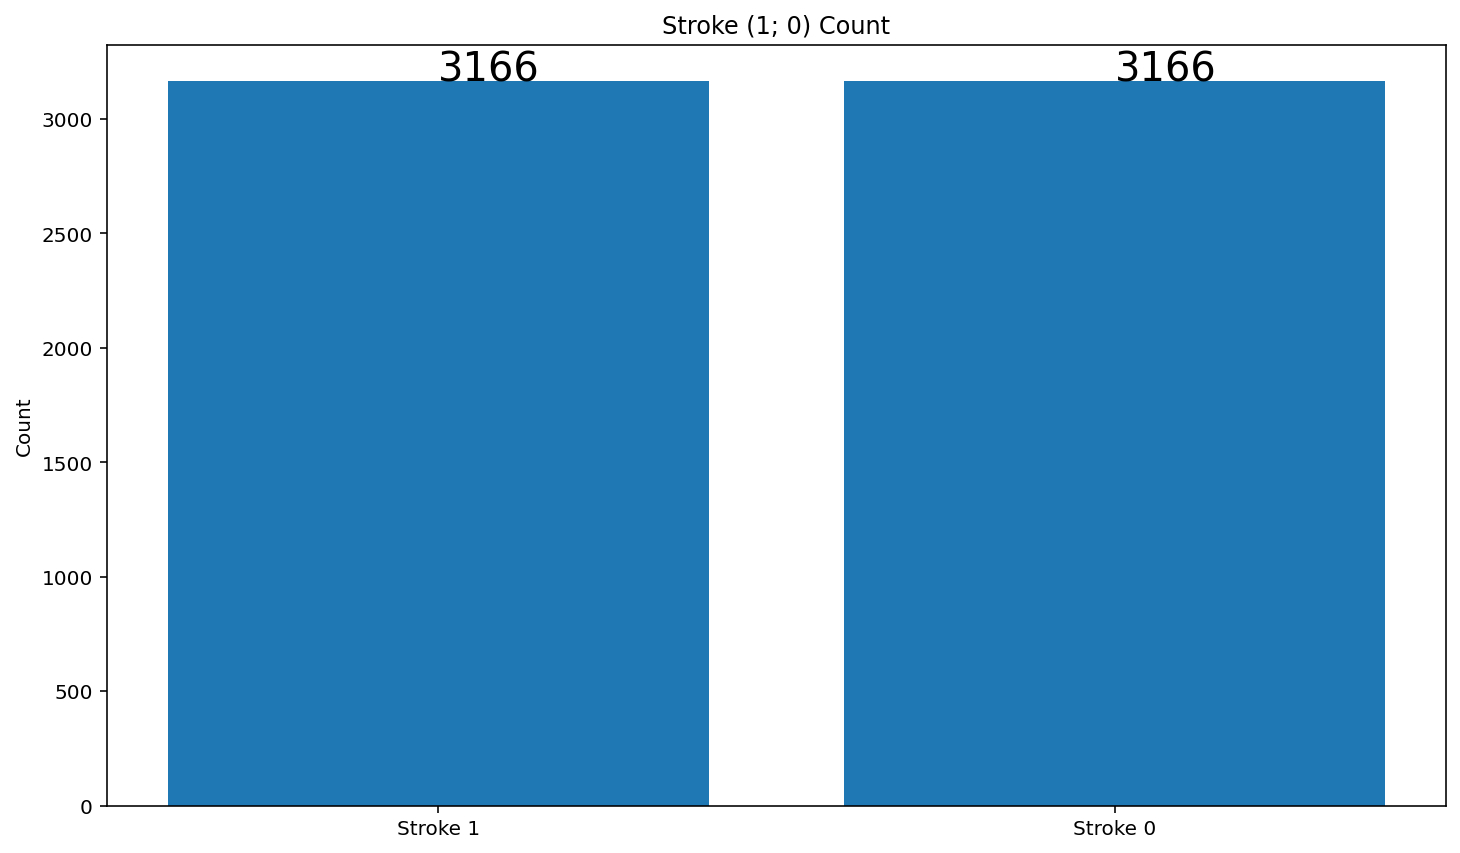

In [5]:
#Como vimos no notebook 01.Data_Analysis, a varíavel dependente "stroke" apresenta um desequilibro que pode prejudicar/enviesar o desempenho dos modelos. Posto isto, aqui aplicamos o smote (técnica para gerar dados sintéticos a partir do conjunto de dados original) que irá permitir equilibrar os dados. Para isso, utilizamos apenas os registos que tiveram AVC, uma vez que são os menos represenatativos. O smote utilizado foi metedologicamente hibrido, acrescentando dados sintéticos a classe com menor frequencia e removendo dados a classe com maior frequencia.
labels = ['age',                            
    'hypertension',               
    'heart_disease',                  
    'avg_glucose_level',               
    'bmi',                                                   
    'gender_Female',                  
    'gender_Male',                     
    'gender_Other',                      
    'ever_married_No',                
   'ever_married_Yes',                
   'work_type_Govt_job',               
   'work_type_Never_worked',         
   'work_type_Private',                 
   'work_type_Self-employed',          
   'work_type_children',              
   'Residence_type_Rural',             
   'Residence_type_Urban',            
   'smoking_status_Unknown',          
   'smoking_status_formerly smoked',  
   'smoking_status_never smoked',     
   'smoking_status_smokes']
df = df.reset_index(drop=True)
X = df[labels]
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=66)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
sm = RandomOverSampler(sampling_strategy=1)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
under = RandomUnderSampler(sampling_strategy=1)
X_train_oversampled, y_train_oversampled = under.fit_resample(X_train_oversampled, y_train_oversampled)

df = pd.concat([X_train_oversampled, y_train_oversampled], axis = 1)
stroke_1 = df[df['stroke']==1]
stroke_1 = stroke_1['stroke'].count()
stroke_0 = df[df['stroke']==0]
stroke_0 = stroke_0['stroke'].count()

objects = ('Stroke 1', 'Stroke 0')
Count = [stroke_1, stroke_0]
y_pos = np.arange(len(objects))

plt.bar(objects, Count)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Stroke (1; 0) Count')

for index,data in enumerate(Count):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))

plt.show()

### Write in Csv

In [7]:
#Exportar um ficheiro no formato "CSV" com o smote aplicado, para ser utilizado nos notebooks seguintes.
X_train.to_csv('X_train.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
X_train_oversampled.to_csv('X_train_oversampled.csv',index=False)
y_train_oversampled.to_csv('y_train_oversampled.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)